# Classical Machine Learning Algorithms

This notebook demonstrates various classical ML algorithms.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Load and Prepare Data

In [2]:
data = load_breast_cancer()
X, y = data.data, data.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## 1. Logistic Regression

In [3]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression Accuracy: {lr_acc:.4f}")

Logistic Regression Accuracy: 0.9825


## 2. k-Nearest Neighbors

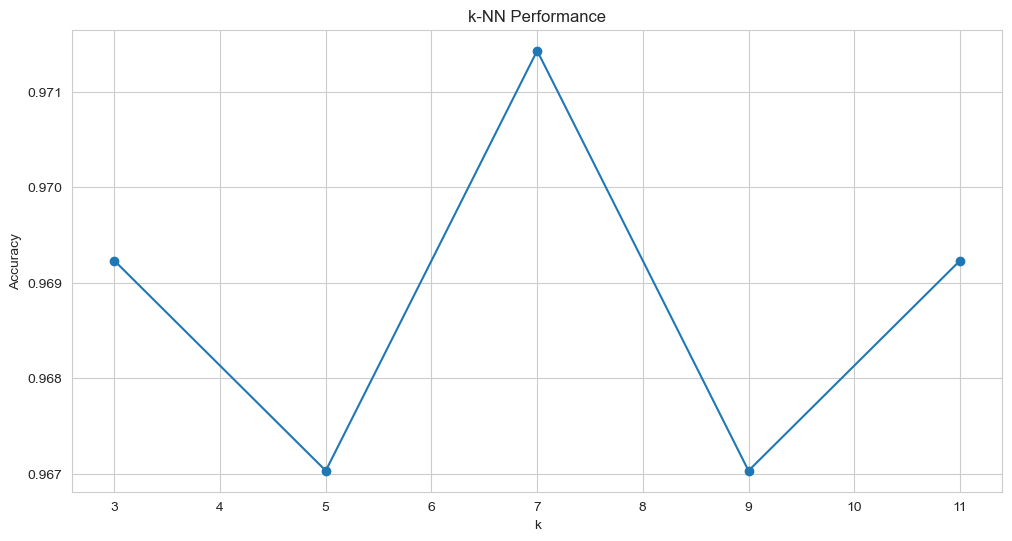

Best k: 7, Accuracy: 0.9649


In [4]:
k_values = [3, 5, 7, 9, 11]
knn_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    knn_scores.append(scores.mean())
plt.plot(k_values, knn_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k-NN Performance')
plt.show()
best_k = k_values[np.argmax(knn_scores)]
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
print(f"Best k: {best_k}, Accuracy: {knn_acc:.4f}")

## 3. Decision Tree

In [5]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_acc:.4f}")

Decision Tree Accuracy: 0.9211


## 4. Random Forest

In [6]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_acc:.4f}")

Random Forest Accuracy: 0.9561


## 5. Gradient Boosting

In [7]:
gb = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)
print(f"Gradient Boosting Accuracy: {gb_acc:.4f}")

Gradient Boosting Accuracy: 0.9561


## 6. Naive Bayes

In [8]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print(f"Naive Bayes Accuracy: {nb_acc:.4f}")

Naive Bayes Accuracy: 0.9298


## 7. Support Vector Machine

In [9]:
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_acc:.4f}")

SVM Accuracy: 0.9825


## Model Comparison

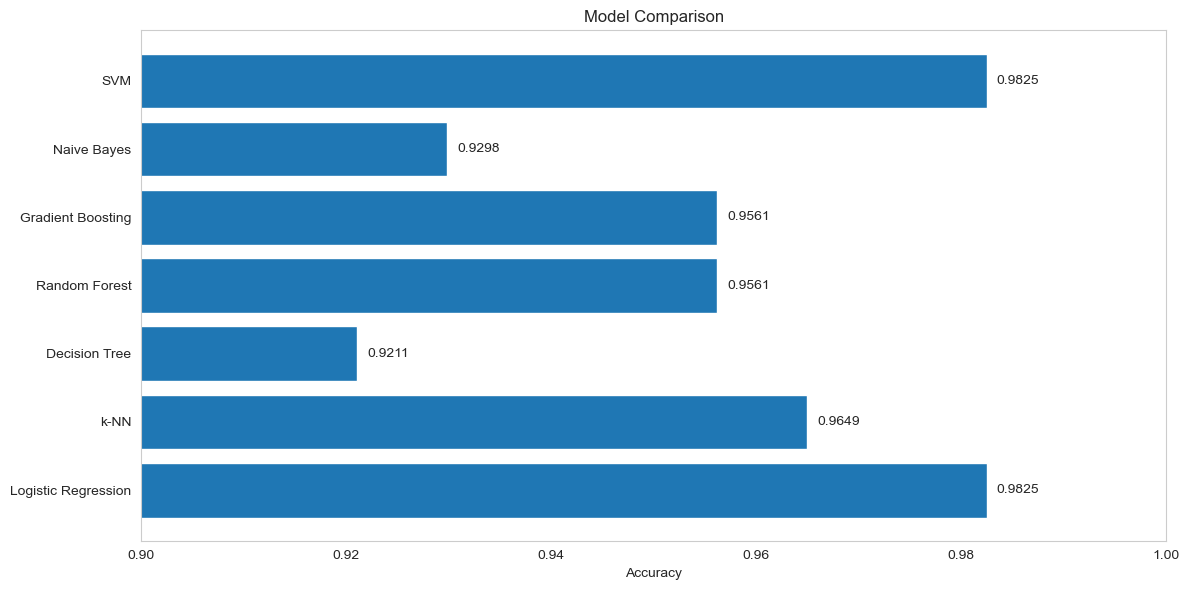

In [11]:
results = {'Logistic Regression': lr_acc, 'k-NN': knn_acc, 'Decision Tree': dt_acc,
            'Random Forest': rf_acc, 'Gradient Boosting': gb_acc, 'Naive Bayes': nb_acc, 'SVM': svm_acc}
models = list(results.keys())
accuracies = list(results.values())
plt.figure(figsize=(12, 6))
plt.barh(models, accuracies)
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.xlim([0.9, 1.0])
for i, v in enumerate(accuracies):
    plt.text(v + 0.001, i, f'{v:.4f}', va='center')
plt.tight_layout()
plt.grid(False)
plt.show()